<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/expedia_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files

In [5]:
uploaded = files.upload()


Saving kaggle.json to kaggle (2).json


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
unanimad/dataisbeautiful                                       Reddit - Data is Beautiful                           11MB  2020-03-21 22:28:28            959  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)  646MB  2020-03-20 23:31:34          31345  
rubenssjr/brasilian-houses-to-rent                             brazilian_houses_to_rent                            282KB  2020-03-25 22:51:17            920  
paultimothymooney/covid19-containment-and-mitigation-measures  COVID-19 containment and mitigation measures         91KB  2020-03-26 14:53:23            148  
sudalairajkumar/novel-corona-virus-2019-datase

In [9]:
! kaggle competitions download -c 'expedia-personalized-sort'

data.zip: Skipping, found more recently modified local copy (use --force to force download)
randomBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
basicPythonBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
testOrderBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip /content/data.zip -d data


Archive:  /content/data.zip
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/test.csv           
replace data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/train.csv          


In [0]:
import pandas as pd
train_data=pd.read_csv('/content/data/train.csv')

In [12]:
train_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917530 entries, 0 to 9917529
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [14]:
train_data.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

In [0]:
train_data.drop(columns=['date_time','visitor_hist_starrating','visitor_hist_adr_usd','prop_location_score2','srch_query_affinity_score','orig_destination_distance','comp1_rate','comp1_inv','comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff','comp3_rate','comp3_inv','comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate','comp5_inv','comp5_rate_percent_diff','comp6_rate','comp6_inv','comp6_rate_percent_diff','comp7_rate','comp7_inv','comp7_rate_percent_diff','comp8_rate','comp8_inv','comp8_rate_percent_diff','gross_bookings_usd'],inplace=True)

In [16]:
train_data.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,12,187,219,893,3,3.5,1,2.83,4.95,27,104.77,0,23246,1,0,4,0,1,1,1,0,0
1,1,12,187,219,10404,4,4.0,1,2.20,5.03,26,170.74,0,23246,1,0,4,0,1,1,1,0,0
2,1,12,187,219,21315,3,4.5,1,2.20,4.92,21,179.80,0,23246,1,0,4,0,1,1,1,0,0
3,1,12,187,219,27348,2,4.0,1,2.83,4.39,34,602.77,0,23246,1,0,4,0,1,1,1,0,0
4,1,12,187,219,29604,4,3.5,1,2.64,4.93,4,143.58,0,23246,1,0,4,0,1,1,1,0,0


In [17]:
train_data.isnull().sum()

srch_id                            0
site_id                            0
visitor_location_country_id        0
prop_country_id                    0
prop_id                            0
prop_starrating                    0
prop_review_score              14630
prop_brand_bool                    0
prop_location_score1               0
prop_log_historical_price          0
position                           0
price_usd                          0
promotion_flag                     0
srch_destination_id                0
srch_length_of_stay                0
srch_booking_window                0
srch_adults_count                  0
srch_children_count                0
srch_room_count                    0
srch_saturday_night_bool           0
random_bool                        0
click_bool                         0
booking_bool                       0
dtype: int64

In [0]:
import numpy as np
train_data['prop_review_score']=train_data['prop_review_score'].fillna(np.mean(train_data['prop_review_score']))

In [19]:
train_data.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,12,187,219,893,3,3.5,1,2.83,4.95,27,104.77,0,23246,1,0,4,0,1,1,1,0,0
1,1,12,187,219,10404,4,4.0,1,2.20,5.03,26,170.74,0,23246,1,0,4,0,1,1,1,0,0
2,1,12,187,219,21315,3,4.5,1,2.20,4.92,21,179.80,0,23246,1,0,4,0,1,1,1,0,0
3,1,12,187,219,27348,2,4.0,1,2.83,4.39,34,602.77,0,23246,1,0,4,0,1,1,1,0,0
4,1,12,187,219,29604,4,3.5,1,2.64,4.93,4,143.58,0,23246,1,0,4,0,1,1,1,0,0


In [0]:
from mlxtend.preprocessing import minmax_scaling
features=list(train_data.columns)
columns=features[:-1]
p=minmax_scaling(train_data, columns=columns,min_val=-1,max_val=1)


In [22]:
p.shape

(9917530, 22)

In [23]:
p.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool
0,0.0,0.333333,0.808696,0.951965,0.006334,0.6,0.7,1.0,0.405444,0.797101,0.666667,0.000005,0.0,0.818047,0.0,0.0,0.375,0.0,0.0,1.0,1.0,0.0
1,0.0,0.333333,0.808696,0.951965,0.073874,0.8,0.8,1.0,0.315186,0.809984,0.641026,0.000009,0.0,0.818047,0.0,0.0,0.375,0.0,0.0,1.0,1.0,0.0
2,0.0,0.333333,0.808696,0.951965,0.151356,0.6,0.9,1.0,0.315186,0.792271,0.512821,0.000009,0.0,0.818047,0.0,0.0,0.375,0.0,0.0,1.0,1.0,0.0
3,0.0,0.333333,0.808696,0.951965,0.194198,0.4,0.8,1.0,0.405444,0.706924,0.846154,0.000031,0.0,0.818047,0.0,0.0,0.375,0.0,0.0,1.0,1.0,0.0
4,0.0,0.333333,0.808696,0.951965,0.210219,0.8,0.7,1.0,0.378223,0.793881,0.076923,0.000007,0.0,0.818047,0.0,0.0,0.375,0.0,0.0,1.0,1.0,0.0


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(p)

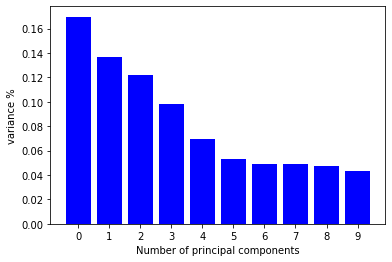

In [37]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Number of principal components')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [0]:
PCA_Components = pd.DataFrame(principal_components)

Text(0, 0.5, 'PCA 2')

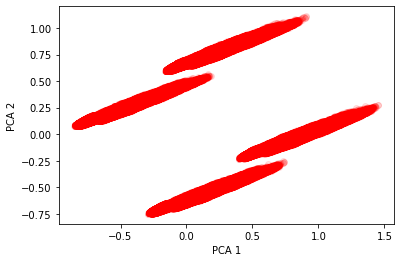

In [40]:
plt.scatter(PCA_Components[0], PCA_Components[1], alpha=.1, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [0]:
k=4
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=4)

In [0]:
y_kmeans = kmeans.fit_predict(p.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values)

In [49]:
len(y_kmeans)

9917530

In [50]:
print(y_kmeans)

[0 0 0 ... 2 2 1]


In [51]:
kmeans.cluster_centers_

array([[ 4.99510815e-01,  2.21321462e-01,  8.13745707e-01,
         8.38145606e-01,  4.97784304e-01,  6.30886772e-01,
         7.88124766e-01,  1.00000000e+00,  3.72512661e-01,
         6.94555052e-01,  4.10443482e-01,  9.93929297e-06,
         1.62297022e-01,  4.89926629e-01,  1.24520175e-02,
         6.18447639e-02,  1.29351767e-01,  4.09969861e-02,
         1.60897965e-02,  1.00000000e+00,  2.72952575e-01,
         4.53810105e-02],
       [ 5.00361555e-01,  2.54983563e-01,  7.79150128e-01,
         8.10927257e-01,  4.97765835e-01,  6.49641382e-01,
         7.87921376e-01,  1.00000000e+00,  3.90750693e-01,
         6.95968516e-01,  4.12532200e-01,  1.31850795e-05,
         1.97039062e-01,  4.88708088e-01,  3.06743401e-02,
         7.47249723e-02,  1.14018415e-01,  4.10317517e-02,
         1.77091647e-02,  2.87281310e-11,  2.87810014e-01,
         4.44372812e-02],
       [ 5.01944716e-01,  3.43016240e-01,  6.79319846e-01,
         6.16283686e-01,  4.97297176e-01,  6.38007841e-01,
    

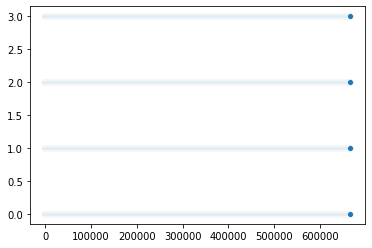

In [67]:
c=list(train_data['srch_id'].values)
sns.scatterplot(c,y_kmeans)

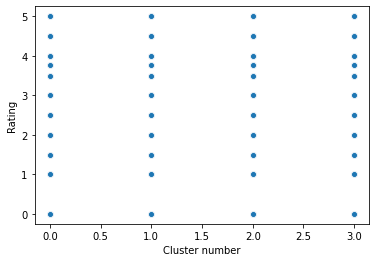

In [70]:
d=list(train_data['prop_review_score'].values)
plt.xlabel('Cluster number')
plt.ylabel('Rating')
sns.scatterplot(y_kmeans,d)

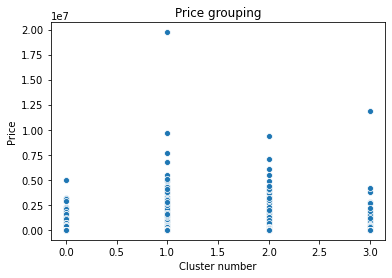

In [71]:
d=list(train_data['price_usd'].values)
plt.xlabel('Cluster number')
plt.ylabel('Price')
plt.title("Price grouping")
sns.scatterplot(y_kmeans,d)

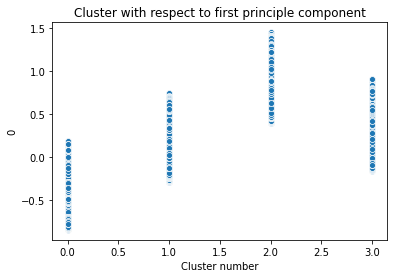

In [75]:
d=PCA_Components[0]
plt.xlabel('Cluster number')
plt.ylabel('PCA-1')
plt.title('Cluster with respect to first principle component')
sns.scatterplot(y_kmeans,d)